In [1]:
%matplotlib inline
import os
import sys
sys.path.append("../src/")

import numpy as np
import cv2
import matplotlib.pyplot as plt

from image_utils import read_image, read_profile
from image_utils import reduce_mask, expand_mask, reverse_mask, extract_border, merge_images

In [2]:
test_dir = "../test/"

input_dir = os.path.join(test_dir,"input/")

image_dir = os.path.join(input_dir, "image/")
profile_dir = os.path.join(input_dir, "profile/")

In [3]:
# image 디렉토리의 파일명과 profile 디렉토리의 파일명은 동일함. 
# 이름을 기준으로 mapping되어 있음
filenames = os.listdir(image_dir) 
filename = filenames[0]

## Read Image

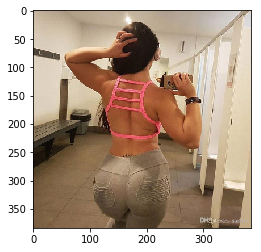

the shape of image : (384, 384, 4)


In [4]:
imagepath = os.path.join(image_dir,filename)

image = read_image(imagepath)
plt.imshow(image)
plt.show()

print("the shape of image : {}".format(image.shape))

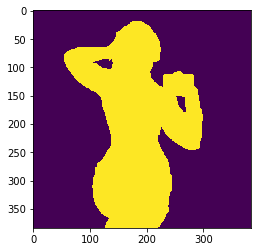

the shape of profile : (384, 384)


In [5]:
profilepath = os.path.join(profile_dir,filename)

profile = read_profile(profilepath)
plt.imshow(profile)
plt.show()

print("the shape of profile : {}".format(profile.shape))

## Mask 연산

### 1. reduce_mask : profile의 영역을 줄임

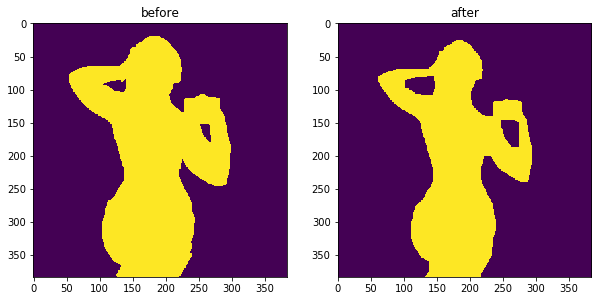

In [6]:
before = profile
after = reduce_mask(profile,5)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)
ax.set_title('before')
ax.imshow(before)
ax = fig.add_subplot(122)
ax.set_title('after')
ax.imshow(after)

### 2. expand_mask : profile의 영역을 늘임

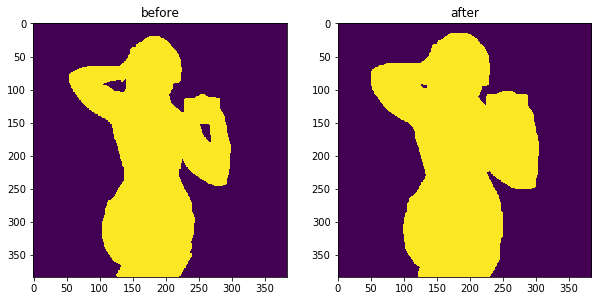

In [7]:
before = profile
after = expand_mask(profile,5)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)
ax.set_title('before')
ax.imshow(before)
ax = fig.add_subplot(122)
ax.set_title('after')
ax.imshow(after)

### 3. reverse_mask : profile을 역전함

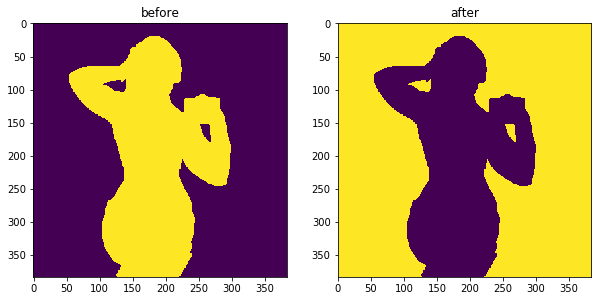

In [8]:
before = profile
after = reverse_mask(profile)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)
ax.set_title('before')
ax.imshow(before)
ax = fig.add_subplot(122)
ax.set_title('after')
ax.imshow(after)

### 4. extract_border: profile의 경계선을 땀

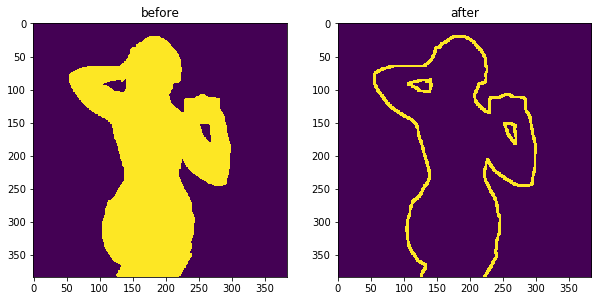

In [9]:
before = profile
after = extract_border(profile,2)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)
ax.set_title('before')
ax.imshow(before)
ax = fig.add_subplot(122)
ax.set_title('after')
ax.imshow(after)

### 5. merge_images: 두 image를 mask를 기준으로 합침

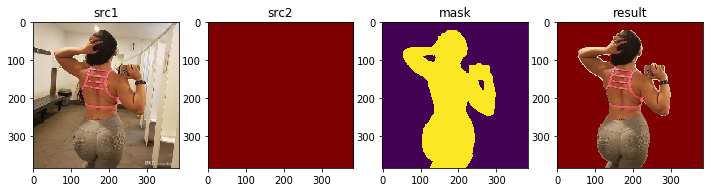

In [10]:
src1 = image
src2 = (np.ones_like(image) * np.array([127,0,0,255])).astype('uint8')
mask = profile
result = merge_images(src1, src2, mask)


fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(141)
ax.set_title('src1')
ax.imshow(src1)
ax = fig.add_subplot(142)
ax.set_title('src2')
ax.imshow(src2)
ax = fig.add_subplot(143)
ax.set_title('mask')
ax.imshow(mask)
ax = fig.add_subplot(144)
ax.set_title('result')
ax.imshow(result)